# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [18]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [16]:
df1 = pd.read_csv("../data/absences.csv" ,index_col = None)

df1 = df1[['EmployeeID','Age','Absences']]
df1

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


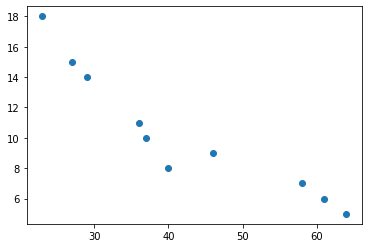

In [23]:
plt.scatter(df1['Age'],df1['Absences'])

In [ ]:
# Clear descending line

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [61]:
# age is independent variable and absence the dependent
x_mean = np.mean(df1['Age'])
y_mean = np.mean(df1['Absences'])

residual_x = [i-x_mean for i in df1['Age']]
residual_y= [i-y_mean for i in df1['Absences']]

numerator = sum([x*y for x,y in zip(residual_x,residual_y)])

denominator = sum([(i - x_mean)**2 for i in df1['Age']])


slope = numerator/denominator
slope

-0.2681088337033404

In [45]:
# intercept
intercept = y_mean - slope*x_mean
intercept

21.58738189891063

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [47]:
x = df1['Age']
predicted_y = intercept + slope * x

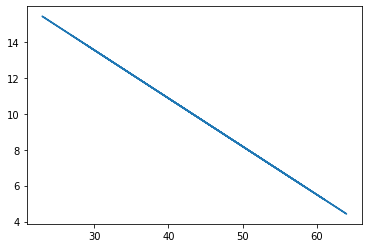

In [48]:
plt.plot(x,predicted_y)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [58]:
#cov(x,y) = SUM(x-x)(y-y)/N

# std_x = np.std(df1['Age'])
# std_y = np.std(df1['Absences'])

# cov = numerator/len(df1['Age'])
# p_xy = cov/(std_x*std_y)

def cov_corr(x,y):
    std_x = np.std(x)
    std_y = np.std(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    residual_x = [i-x_mean for i in x]
    residual_y= [i-y_mean for i in y]
    numerator = sum([a*b for a,b in zip(residual_x,residual_y)])
    cov = numerator/len(x)
    p_xy = cov/(std_x*std_y)
    return cov,p_xy 
    

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [59]:
cov_corr(df1['Age'],df1['Absences'])

(-51.92999999999999, -0.9325434092481012)

In [70]:
# Standard deviation is a measure of dispersion of data from its average
# Covariance is a measure of how TWO variables change together, but its
# magnitude is unbounded, therefore difficult to interpret. By dividing the 
# covariance by the product of the two std dev, one can calculate the normalized
# version of the statistic-> correlation coefficient
# -0.93 shows a strong negative relation

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [71]:
pd.DataFrame({'slope': [-0.2681], 'intercept':[21.587], 'covariance':[-51.92],
             'corr':[-0.93]})


,slope,intercept,covariance,corr
0,-0.2681,21.587,-51.92,-0.93


In [72]:
# there is a clear relation between age and absenteeism
# first of all , we see a downward pattern. In addition, we determine
# a correlation of -0.93, which is high (and negative)

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [117]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [74]:
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


In [75]:
cov_corr(ironbeers_df['X'], ironbeers_df['Y'])
    

(10.5, 0.9770084209183942)

In [76]:
# A strong correlation between telling and staying in the end

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

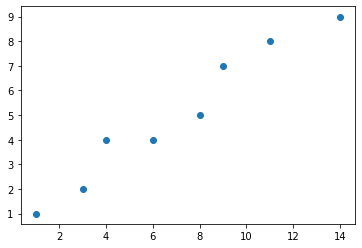

In [77]:
plt.scatter(ironbeers_df['X'], ironbeers_df['Y'])

In [78]:
# A clear (linear) pattern is shown

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [83]:
def reg_line(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    residual_x = [i-x_mean for i in x]
    residual_y= [i-y_mean for i in y]
    numerator = sum([a*b for a,b in zip(residual_x,residual_y)])
    denominator = sum([(i - x_mean)**2 for i in x])
    slope = numerator/denominator
    intercept = y_mean - slope*x_mean
    return(slope,intercept)

In [88]:
reg_line(ironbeers_df['X'], ironbeers_df['Y'])
slope2 = 0.6363636363636364
intercept2 = 0.5454545454545459

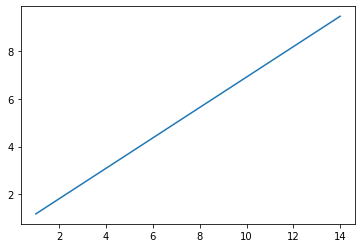

In [89]:
estimate_y =intercept2 + slope2*ironbeers_df['X']
plt.plot(ironbeers_df['X'],estimate_y)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [90]:
# Not enough people are told to stay

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [118]:
ironbeers_df.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


In [119]:
expected_Y = intercept2 + slope2*ironbeers_df['X']
ironbeers_df['expected_Y'] =expected_Y 
ironbeers_df

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

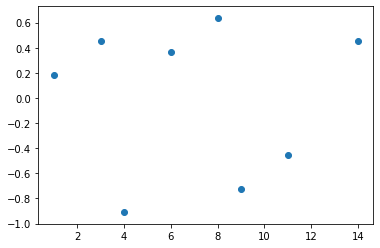

In [120]:
ironbeers_df['error'] = ironbeers_df['expected_Y'] - ironbeers_df['Y']

plt.scatter(ironbeers_df['X'], ironbeers_df['error'])

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [114]:
# yes , the biggest errors are x=4 and x=8/9



#### 4.- Remove the points with a high error and recalculate the regression line.

In [122]:
ironbeers_df.head(10)

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
2,4,4,3.090909,-0.909091
3,6,4,4.363636,0.363636
4,8,5,5.636364,0.636364
5,9,7,6.272727,-0.727273
6,11,8,7.545455,-0.454545
7,14,9,9.454545,0.454545


In [124]:
new_iron = ironbeers_df.drop([2,4,5])


In [127]:
new_iron
reg_line(new_iron['X'],new_iron['Y'])

(0.652542372881356, 0.23220338983050848)

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [128]:
cov_corr(new_iron['X'],new_iron['Y'])

(15.4, 0.9945299478460593)

In [ ]:
# Higher correlation by deleting the three highest errors
# 